In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from scipy.stats import mode

In [2]:
# ----- Load Data -----
iris = load_iris()
X = iris.data
y_true = iris.target

In [3]:
# ----- Elbow Method to Find Optimal k -----
distortions = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    distortions.append(km.inertia_)  # Inertia = within-cluster sum of squares


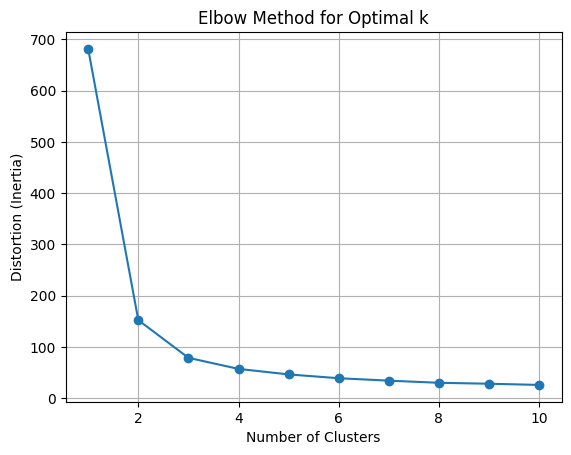

In [4]:
# Plot elbow curve
plt.figure()
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [5]:
# Choose k = 3 (you can automate elbow detection if needed)
optimal_k = 3
print(f"Using k = {optimal_k}")

Using k = 3


In [6]:
# ----- Fit KMeans with Optimal k -----
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

In [7]:
# ----- Map Clusters to True Labels -----
labels = np.zeros_like(y_pred)
for i in range(optimal_k):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

In [8]:
# ----- Evaluation -----
accuracy = accuracy_score(y_true, labels)
ari = adjusted_rand_score(y_true, y_pred)
conf_mat = confusion_matrix(y_true, labels)

print("Accuracy Score:", accuracy)
print("Adjusted Rand Index (ARI):", ari)
print("Confusion Matrix:\n", conf_mat)

Accuracy Score: 0.8933333333333333
Adjusted Rand Index (ARI): 0.7302382722834697
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
